<a href="https://colab.research.google.com/github/YuvrajZende/Machine-Learning-Practice/blob/main/ML5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv("/content/pacific.csv")
data.head(10)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
5,EP011949,UNNAMED,19490612,600,,TS,20.5N,109.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
6,EP011949,UNNAMED,19490612,1200,,TS,20.6N,110.2W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
7,EP021949,UNNAMED,19490617,1200,,TS,14.1N,107.0W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
8,EP021949,UNNAMED,19490617,1800,,TS,14.6N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
9,EP021949,UNNAMED,19490618,0,,TS,15.0N,108.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [4]:
data.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,2.613700e+04,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000
mean,1.988908e+07,896.050427,48.949344,18.176225,-745.064851,-746.312125,-748.290929,-746.320542,-751.604622,-752.094923,-752.701917,-752.102957,-753.584382,-753.787160,-754.046945,-753.774534
std,1.688455e+05,672.008065,25.334450,996.896388,447.193480,444.883379,441.232953,444.939111,435.198872,434.303796,433.202389,434.291049,431.605766,431.239618,430.773515,431.263235
min,1.949061e+07,0.000000,10.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.976081e+07,0.000000,30.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,1.990081e+07,600.000000,45.000000,941.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,2.003092e+07,1200.000000,65.000000,1002.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
max,2.015113e+07,2300.000000,185.000000,1021.000000,300.000000,270.000000,180.000000,1180.000000,150.000000,150.000000,105.000000,150.000000,100.000000,75.000000,75.000000,100.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                26137 non-null  object
 1   Name              26137 non-null  object
 2   Date              26137 non-null  int64 
 3   Time              26137 non-null  int64 
 4   Event             26137 non-null  object
 5   Status            26137 non-null  object
 6   Latitude          26137 non-null  object
 7   Longitude         26137 non-null  object
 8   Maximum Wind      26137 non-null  int64 
 9   Minimum Pressure  26137 non-null  int64 
 10  Low Wind NE       26137 non-null  int64 
 11  Low Wind SE       26137 non-null  int64 
 12  Low Wind SW       26137 non-null  int64 
 13  Low Wind NW       26137 non-null  int64 
 14  Moderate Wind NE  26137 non-null  int64 
 15  Moderate Wind SE  26137 non-null  int64 
 16  Moderate Wind SW  26137 non-null  int64 
 17  Moderate Win

In [9]:
print(data.isnull().sum())
if data.isnull().sum().sum() > 0:
    data = data.fillna(method='ffill')
    print("\n Missing values filled using forward fill method")

ID                  0
Name                0
Date                0
Time                0
Event               0
Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wind SW    0
Moderate Wind NW    0
High Wind NE        0
High Wind SE        0
High Wind SW        0
High Wind NW        0
dtype: int64


In [13]:
num_col = data.select_dtypes(include=['int64','float64']).columns
data[num_col] = data[num_col].fillna(data[num_col].mean())

cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
  data[col] = data[col].fillna(data[col].mode()[0])


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
  data[col] = le.fit_transform(data[col])
data.head(10)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,67,235,19490611,0,0,11,102,63,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,67,235,19490611,600,0,11,102,64,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,67,235,19490611,1200,0,11,102,67,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,67,235,19490611,1800,0,11,103,77,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,67,235,19490612,0,0,11,104,86,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
5,67,235,19490612,600,0,11,105,94,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
6,67,235,19490612,1200,0,11,106,102,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
7,134,235,19490617,1200,0,11,41,70,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
8,134,235,19490617,1800,0,11,46,77,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
9,134,235,19490618,0,0,11,50,84,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [16]:
target_column = data.columns[-1]
X = data.drop(columns=[target_column])
y = data[target_column]

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=42,random_state=42)

In [27]:
model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1
)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [28]:
y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.9761904761904762
              precision    recall  f1-score   support

        -999       1.00      1.00      1.00        32
           0       1.00      0.86      0.92         7
          15       0.00      0.00      0.00         0
          20       1.00      1.00      1.00         2
          30       1.00      1.00      1.00         1

    accuracy                           0.98        42
   macro avg       0.80      0.77      0.78        42
weighted avg       1.00      0.98      0.99        42



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


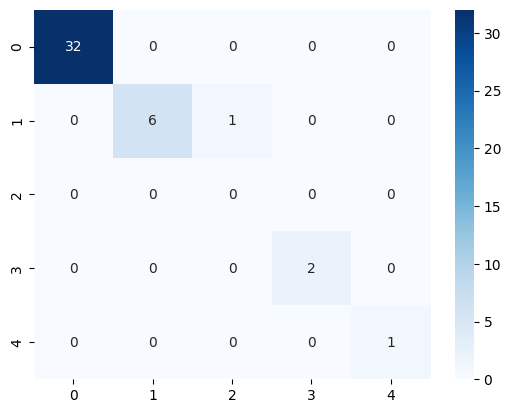

In [29]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.show()

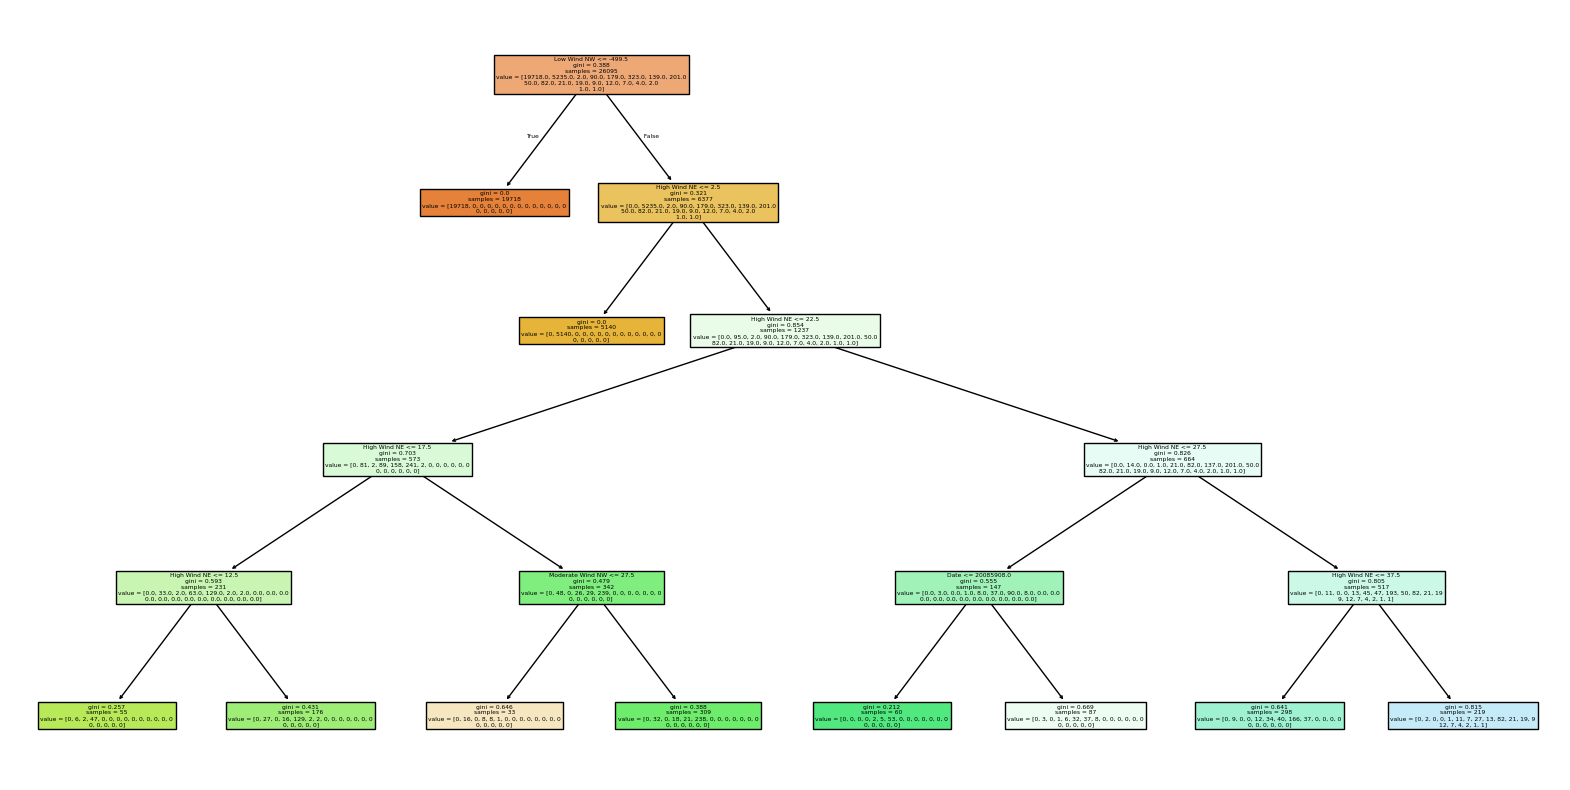

In [30]:
plt.figure(figsize=(20,10))
plot_tree(model,filled=True,feature_names=X.columns)
plt.show()